In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv("dataset.csv")

Solution = pd.DataFrame({
    "subtaskID": [],
    "Value1": [],
    "Value2": []
})

<Axes: xlabel='latitude', ylabel='longitude'>

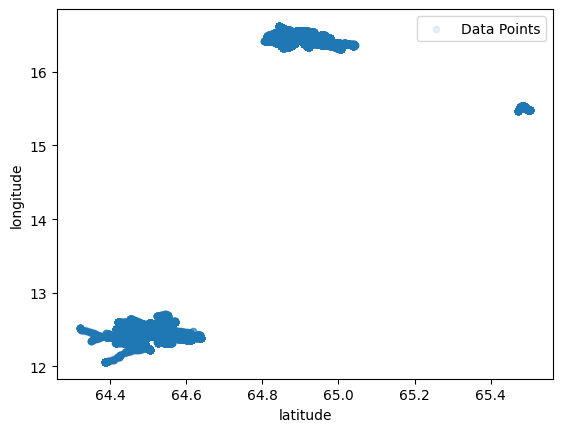

In [4]:
X.plot(x="latitude", y="longitude", kind="scatter",  
       alpha=0.1, label="Data Points")

In [5]:
# task 1

distinct_vehicle_types = X["vehicle_type"].value_counts().size
distinct_vehicles = X["id"].value_counts().size

Solution.loc[len(Solution)] = [1, distinct_vehicles, distinct_vehicle_types]

Solution

,subtaskID,Value1,Value2
0,1,663,4


In [ ]:
# task 2
from sklearn.cluster import KMeans
vehicle_centroids = X.groupby("id")[["latitude", "longitude"]].mean().reset_index()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(vehicle_centroids[["latitude", "longitude"]])

vehicle_centroids["label"] = kmeans.labels_

task2_rows = pd.DataFrame({
    "subtaskID": 2,
    "Value1": vehicle_centroids["id"],
    "Value2": vehicle_centroids["label"]
})

Solution = pd.concat([Solution, task2_rows], ignore_index=True)

array([[64.50956724, 12.4575878 ],
       [64.89735183, 16.44837628],
       [65.49352634, 15.4916497 ]])

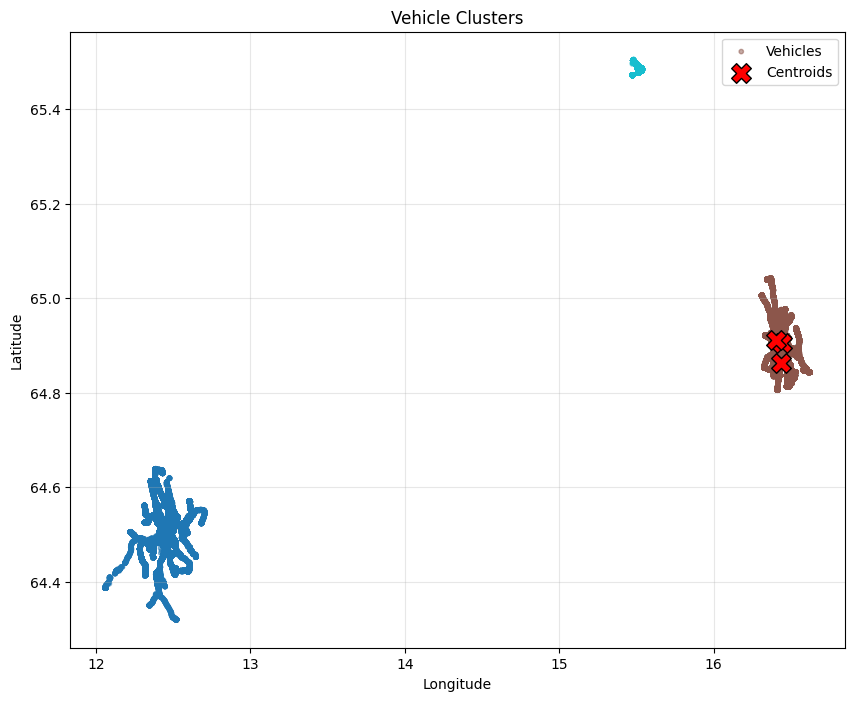

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(X["longitude"], X["latitude"], 
                     c=X["label"], cmap="tab10", 
                     s=10, alpha=0.5, label="Vehicles")

ax.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
           c='red', marker='X', s=200, label="Centroids", edgecolors='black')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Vehicle Clusters")
ax.legend()
plt.grid(True, alpha=0.3)

plt.show()

In [8]:
X["timestamp"] = pd.to_datetime(X["timestamp"])
vehicles_t10 = X[(X["vehicle_type"] == 10) & 
    (X["timestamp"].dt.hour.isin([0, 1]))].copy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(vehicles_t10[["latitude", "longitude"]])

centers = kmeans.cluster_centers_
sorted_centers = centers[centers[:, 0].argsort()]

task3_rows = pd.DataFrame({
    "subtaskID": 3,
    "Value1": sorted_centers[:, 0], 
    "Value2": sorted_centers[:, 1]  
})

Solution = pd.concat([Solution, task3_rows], ignore_index=True)

In [9]:
Solution.to_csv("submission.csv", index=None)

Solution.tail()

,subtaskID,Value1,Value2
662,2,662.000000,1.000000
663,2,663.000000,0.000000
664,3,64.863212,16.432879
665,3,64.905002,16.438920
666,3,64.910779,16.400842
